Computa**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho



---

# Árvores de Decisão

- Árvores de decisão são modelos estatísticos que utilizam um
treinamento supervisionado para a classificação e previsão de dados.
- Utilizam a estratégia de dividir para conquistar.
    - Um problema complexo é decomposto em subproblemas mais simples.
    - Esta estratégia é aplicada recursivamente a cada subproblema.




- Uma árvore de decisão representa a disjunção de conjunções de
restrições nos valores dos atributos.
- Cada ramo na árvore é uma conjunção de condições.
- O conjunto de ramos na árvore é disjunto - **Forma Normal
Disjuntiva**.


- A partir de um conjunto de atributos, decide SIM ou NÃO.
- A precisão é diretamente proporcional à quantidade de exemplos.

- **Função aprendida**: Representada por uma árvore de decisão.
- **Entrada**: Objeto ou situação (alvo) descrita por um conjunto de atributos.
- **Saída**: Decisão sobre o alvo SIM ou NÃO.
- **Objetivo**: Tomar decisões e classificar objetos (neste caso,
classificação booleana).



## Problemas apropriados

- Instâncias descritas por pares atributo-valor.
- Função alvo utiliza valores discretos de saída.
- Representa conhecimento proposicional, onde descrições disjuntas são aplicadas.



## Exemplo de árvore de decisão



In [ ]:
# Carregar as  figuras('estruturaArvore.png','dadosTreinamento','entropia','ganho1', 'ganho2' e 'graficoTreinamento.png') para o ambiente virtual

from google.colab import files
uploaded = files.upload()

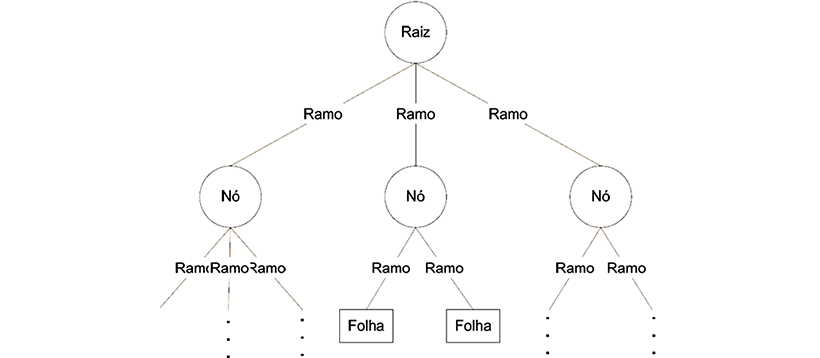

In [2]:
from IPython.display import Image, display

display(Image(filename='estruturaArvore.png'))

- Podemos usar a entropia e o ganho de informação na indução de uma árvore de decisão:

  - A **entropia** mede a homogeneidade do conjunto de  exemplos (exemplos de treinamento).
  - O **ganho de informação** é a redução esperada na entropia, causada pela partição nos exemplos por um atributo.


             - Para um conjunto de exemplos S:

$$Entropia(S) \equiv -p_{\oplus}log_{2}p_{\oplus} - p_{\ominus}log_{2}p_{\ominus}$$


$$Ganho(S,A) \equiv Entropia(S) - \sum\limits_{v\in val(A)} \frac{\left|S_v\right|}{\left|S\right|}Entropia(S_v)$$





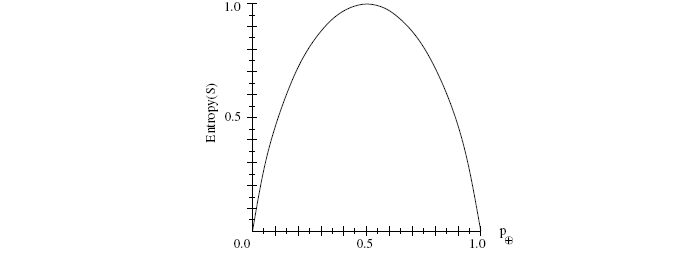

In [3]:
display(Image(filename='entropia.png'))


  - O **índice Gini** também pode ser usado. Ele mede o grau de heterogeneidade dos dados.

$$I_G(p) = \sum{p_i(1 - p_i)} = 1 - \sum{p_i^2}$$

       onde p_i é a frequêndia relativa de cada classe em cada nó.

- Quando este índice é igual a zero, o nó é puro. Por outro lado, quando ele se aproxima   do   valor   um,   o   nó   é   impuro   (aumenta   o   número   de   classes    uniformemente distribuídas neste nó). 
- Selecionamos uma partição que minimiza a impureza Gini para os nós filhos.

- O ganho de informação será:

$$H(p) = -\sum{p_i \log_2{p_i}}$$

**Exemplo:**

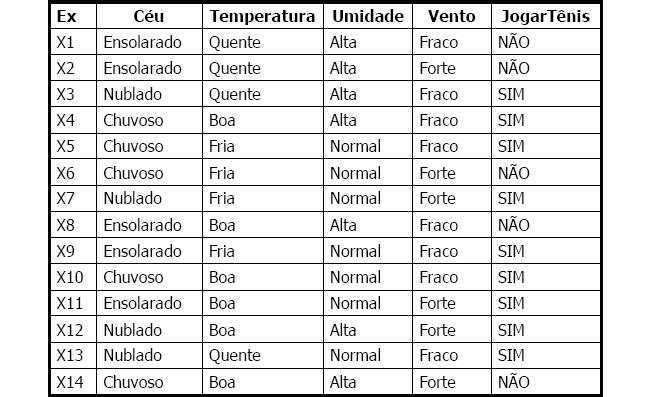

In [4]:
display(Image(filename='dadosTreinamento.png'))

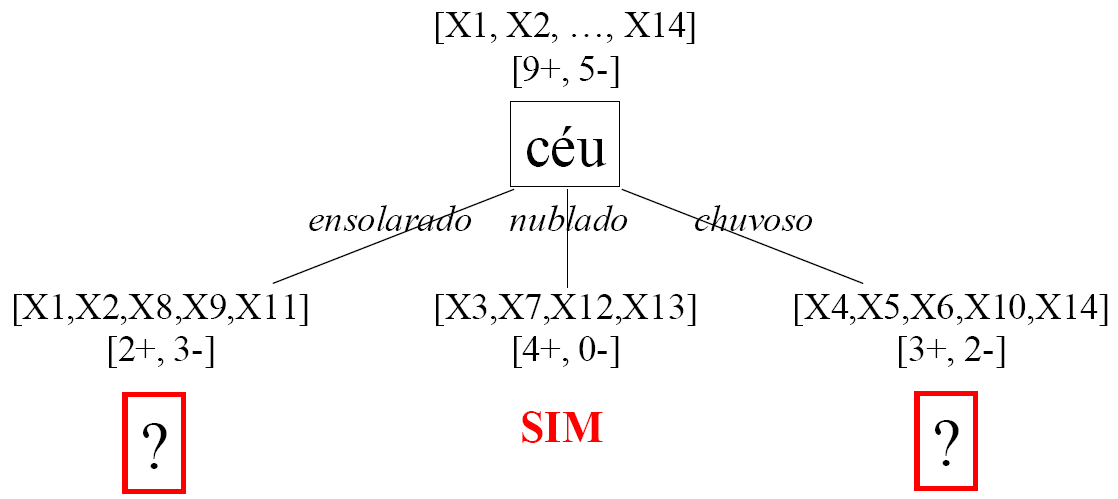

In [5]:
display(Image(filename='ganho2.png'))

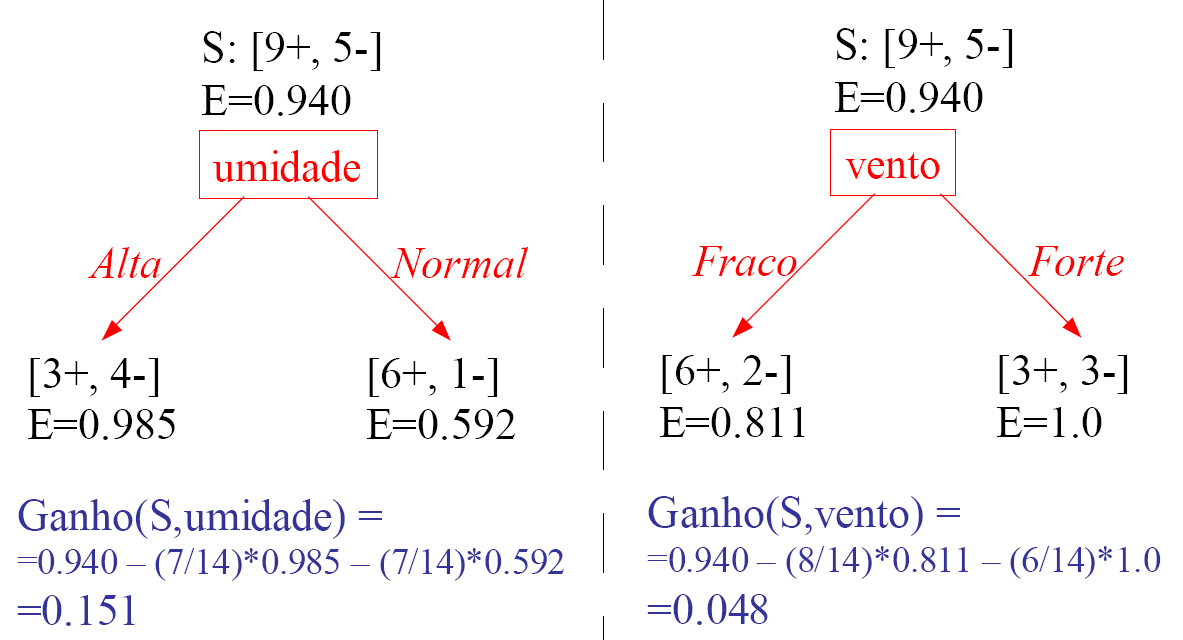

In [6]:
display(Image(filename='ganho1.png'))

# Algoritmos mais conhecidos

Estes algoritmos adotam uma abordagem gulosa (i.e.  sem *backtracking*), de forma *top-down*, recursiva, sob a estratégia "dividir para conquistar".

### ID3 (*Iterative Dichotomise*)


   
1.    Começar com todos os exemplos de treino;
2.    Escolher o atributo que melhor divide os exemplos - usar a entropia e o ganho de informação;
3.    Para o atributo escolhido, criar um nó filho para cada valor possível do atributo;
4.    Transportar os exemplos para cada filho tendo em conta o valor do filho;
5.     Repetir o procedimento para cada filho para o qual cada atributo tem mais de um valor no conjunto de exemplos.


## C4.5

Este algoritimo é um aprimoramento do ID3, por ser capaz de lidar com dados indisponíveis, com valores contínuos, poda na árvore gerada e  a derivação de regras.

## CART (*Classification And Regression Trees*)

Usa a mesma metodologia de "dividir para conquistar" do algoritmo C4.5. A diferença está na estrutura da árvore (só trata de árvores com divisões binárias), no critério de particionamento (usa o índice Gini), no método de poda (poda de complexidade de mínimo custo) e na forma comos os valores ausentes são tratados (usa somente instâncias dos exemplos com valores conhecidos).



1.   Definir o conjunto de regras para dividir o nó em dois nós filhos (as perguntas podem ser apenas aquelas que tem resposta do tipo 'sim' ou 'não')
2.   Encontra a melhor divisão pelo critério Gini.
3.   Repetir o processo até que novas divisões sem impossível ou que seja interrompido.
4. Aplicar o processo de pós-poda para encontrar a árvore de menor custo (aquela com menor taxa de erro e de menor complexidade)



In [ ]:
# Carregar os arquivos utils.py learning.py para o ambiente virtual

from google.colab import files
uploaded = files.upload()

In [9]:
#criar uma pasta para guardar as bases de dados

!mkdir aima-data

In [ ]:
!ls

In [ ]:
# Carregar as bases de dados (iris.csv, orings.csv,restaurant.csv,zoo.csv) para o ambiente virtual
 
from google.colab import files
uploaded = files.upload()

In [ ]:
#mover as bases de dados para a pasta de dados
!mv *.csv aima-data

In [10]:
from learning import *
#from notebook import *

In [15]:
iris = DataSet(name="iris")

DTL = DecisionTreeLearner(iris)
print(DTL([2.5, 1.9, 1.5, 1.1]))

setosa


**Problema**:  *overfiting* (sobreajuste)

Como evitar?

1.   Parar de crescer a árvore antes de alcançar o ponto de classicação
2.   Desenvolver uma árvore completa e então fazer uma poda.



**Validação cruzada**: 


*   Um algoritmo de aprendizagem é bom se produz hipóteses que fazem um
bom trabalho de previsão das classicações de exemplos não vistos.



  1. Colecione um conjunto grande de exemplos;
  2. Divida em 2 conjuntos disjuntos:
    * conjunto de treinamento
    * conjunto de teste
  3. Use o algoritmo de aprendizado com o conjunto de treinamento para
gerar a hipóteses h.
  4. Calcule a percentagem de exemplos no conjunto de teste que estão
corretamente classicados por h.
  5. Repita os passos 1 a 4 para diferentes conjuntos.

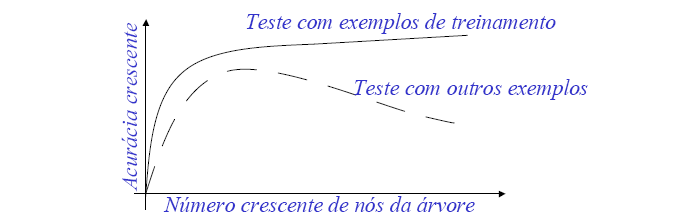

In [16]:
display(Image(filename='graficoTreinamento.png'))